# 120 Years of Olympic History: Athletes and Results

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib as hl

## First Exploration of the Data

### Infomation about the dataset from Kaggle:

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA

In [3]:
os_data = pd.read_csv("Data/athlete_events.csv")
os_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
os_data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
os_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
os_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Exercise 0

### a) How many countries are represented in the dataset?

In [7]:
print(f"Number of countries represented in the dataset: {len(os_data['NOC'].unique())}.")

Number of countries represented in the dataset: 230.


There are more countries represented in the dataset, than there are countries in the world right now. This is because countries that no longer exists (e.g. Soviet Union (URS), see below), still are represented in the data.

### b) Which countries are represented in the dataset? 

In [8]:
for country in sorted(os_data["NOC"].unique()):
    print(country, end = " ")

AFG AHO ALB ALG AND ANG ANT ANZ ARG ARM ARU ASA AUS AUT AZE BAH BAN BAR BDI BEL BEN BER BHU BIH BIZ BLR BOH BOL BOT BRA BRN BRU BUL BUR CAF CAM CAN CAY CGO CHA CHI CHN CIV CMR COD COK COL COM CPV CRC CRO CRT CUB CYP CZE DEN DJI DMA DOM ECU EGY ERI ESA ESP EST ETH EUN FIJ FIN FRA FRG FSM GAB GAM GBR GBS GDR GEO GEQ GER GHA GRE GRN GUA GUI GUM GUY HAI HKG HON HUN INA IND IOA IRI IRL IRQ ISL ISR ISV ITA IVB JAM JOR JPN KAZ KEN KGZ KIR KOR KOS KSA KUW LAO LAT LBA LBR LCA LES LIB LIE LTU LUX MAD MAL MAR MAS MAW MDA MDV MEX MGL MHL MKD MLI MLT MNE MON MOZ MRI MTN MYA NAM NBO NCA NED NEP NFL NGR NIG NOR NRU NZL OMA PAK PAN PAR PER PHI PLE PLW PNG POL POR PRK PUR QAT RHO ROT ROU RSA RUS RWA SAA SAM SCG SEN SEY SGP SKN SLE SLO SMR SOL SOM SRB SRI SSD STP SUD SUI SUR SVK SWE SWZ SYR TAN TCH TGA THA TJK TKM TLS TOG TPE TTO TUN TUR TUV UAE UAR UGA UKR UNK URS URU USA UZB VAN VEN VIE VIN VNM WIF YAR YEM YMD YUG ZAM ZIM 

### c) Which sports are represented in the dataset?

In [9]:
for sport in sorted(os_data["Sport"].unique()):
    print(sport, end = " ")

Aeronautics Alpine Skiing Alpinism Archery Art Competitions Athletics Badminton Baseball Basketball Basque Pelota Beach Volleyball Biathlon Bobsleigh Boxing Canoeing Cricket Croquet Cross Country Skiing Curling Cycling Diving Equestrianism Fencing Figure Skating Football Freestyle Skiing Golf Gymnastics Handball Hockey Ice Hockey Jeu De Paume Judo Lacrosse Luge Military Ski Patrol Modern Pentathlon Motorboating Nordic Combined Polo Racquets Rhythmic Gymnastics Roque Rowing Rugby Rugby Sevens Sailing Shooting Short Track Speed Skating Skeleton Ski Jumping Snowboarding Softball Speed Skating Swimming Synchronized Swimming Table Tennis Taekwondo Tennis Trampolining Triathlon Tug-Of-War Volleyball Water Polo Weightlifting Wrestling 

### d) Which medals are represented in the dataset?

In [12]:
for medal in os_data["Medal"][os_data["Medal"].notna()].unique():
    print(medal)

Gold
Bronze
Silver


### e) Statistics for the age: mean, median, min, max, std

In [13]:
os_data["Age"].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [14]:
os_data["Age"].median()

24.0

#### Statistics for age:
Mean: 25.6<br>
Median: 24<br>
Min: 10<br>
Max: 97<br>
Standard deviation: 6.4

### f) Continue exploring the data with own questions

In [15]:
os_data["Height"].groupby(os_data["Sex"]).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,67378.0,167.839740,8.778528,127.0,162.0,168.0,173.0,213.0
M,143567.0,178.858463,9.360318,127.0,172.0,179.0,185.0,226.0


In [16]:
os_data["Weight"].groupby(os_data["Sex"]).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,66771.0,60.021252,10.21225,25.0,54.0,59.0,65.0,167.0
M,141470.0,75.743677,13.21161,28.0,67.0,74.0,83.0,214.0


In [17]:
os_data["Height"].describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

The tallest is 226 cm and the shortest is 127 cm.

### g) Plot features from the data - pie chart for gender

In [18]:
#Create new data frame with gender count
#We have to split it on ID, otherwise some people (who have one several medals) will be counted several times

gender = ["Female", "Male"]
count = [len(os_data[os_data["Sex"] == "F"].groupby(os_data["ID"])), 
        len(os_data[os_data["Sex"] == "M"].groupby(os_data["ID"]))]

gender_count_ID = pd.DataFrame(dict(Gender=gender, Count=count))
gender_count_ID

,Gender,Count
0,Female,33981
1,Male,101590


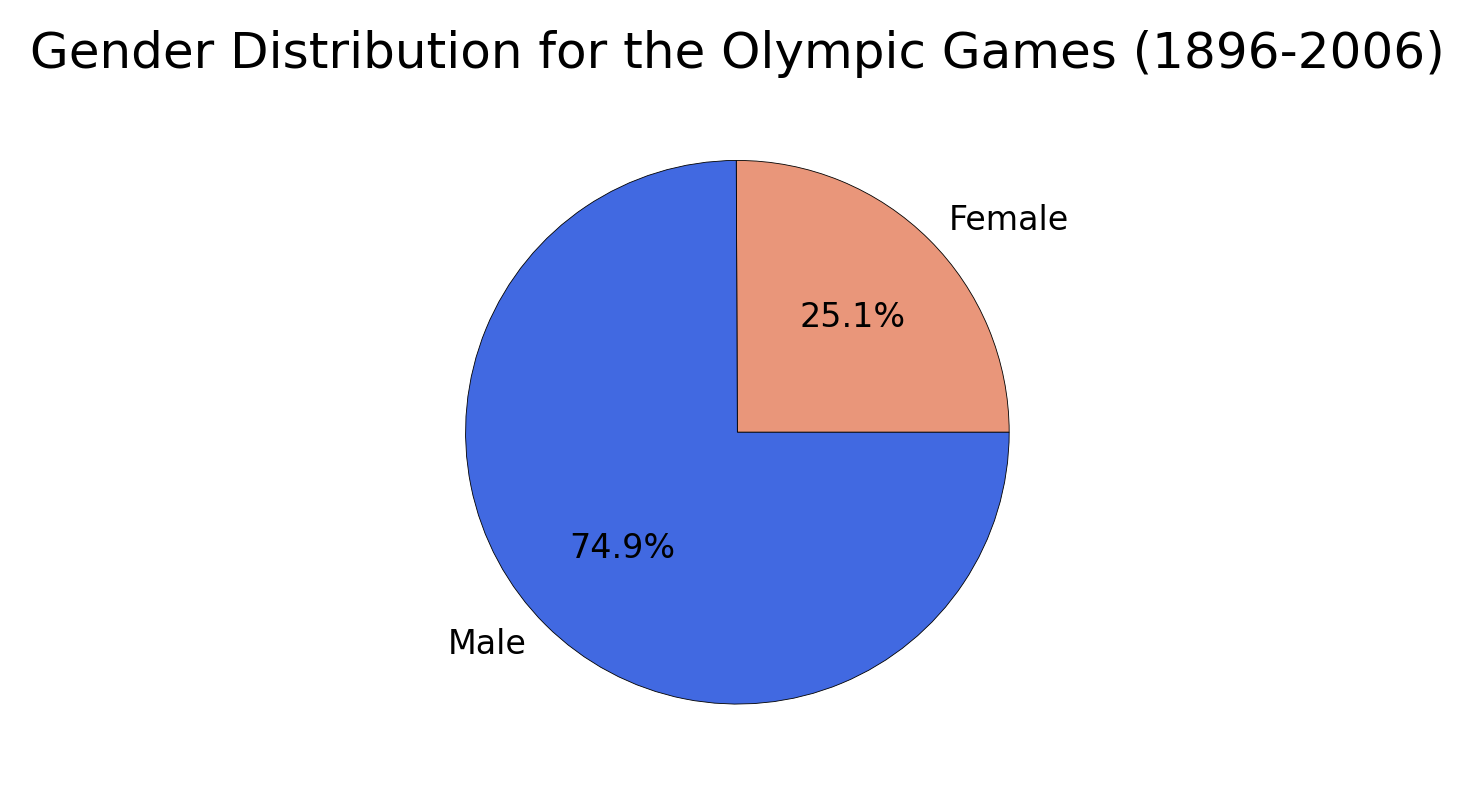

In [19]:
#Plotting data split on ID

fig, ax = plt.subplots(dpi=300, figsize=(3,3), facecolor="white")

ax.pie(gender_count_ID["Count"], 
    labels=gender_count_ID["Gender"], 
    colors=["darksalmon", "royalblue"],
    autopct="%.1f%%", #Adds percentage
    wedgeprops={"linewidth": 0.2, "edgecolor": "black"}, 
    textprops={'size': 8}
    );

_ = ax.set_title("Gender Distribution for the Olympic Games (1896-2006)", fontsize=12)

#Reference for styling: https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/

### h) Plot features from the data - bar chart for top 10 countries that have won most prices

In [20]:
medals = os_data[os_data["Medal"].isna() == False]
medals.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [21]:
medals.info() #No null values for Medal

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39783 non-null  int64  
 1   Name    39783 non-null  object 
 2   Sex     39783 non-null  object 
 3   Age     39051 non-null  float64
 4   Height  31072 non-null  float64
 5   Weight  30456 non-null  float64
 6   Team    39783 non-null  object 
 7   NOC     39783 non-null  object 
 8   Games   39783 non-null  object 
 9   Year    39783 non-null  int64  
 10  Season  39783 non-null  object 
 11  City    39783 non-null  object 
 12  Sport   39783 non-null  object 
 13  Event   39783 non-null  object 
 14  Medal   39783 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.9+ MB


In [22]:
medals_count_per_sport = medals.drop_duplicates(subset=["Event", "Games", "Medal"])
medals_count_per_sport

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270986,135508,Vera Igorevna Zvonaryova,F,23.0,172.0,59.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Women's Singles,Bronze
271010,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver


In [23]:
medals_count_per_sport = pd.DataFrame({"Number medals won": medals_count_per_sport["Medal"].groupby(medals_count_per_sport["NOC"]).count()}).reset_index()
medals_count_per_sport

,NOC,Number medals won
0,AHO,1
1,ALG,14
2,ANZ,12
3,ARG,73
4,ARM,15
...,...,...
141,VIE,4
142,WIF,2
143,YUG,82
144,ZAM,1


In [24]:
#Pick out the top 10 countries
top_countries_per_sport = medals_count_per_sport.sort_values(by="Number medals won", ascending=False).head(10)
top_countries_per_sport

,NOC,Number medals won
138,USA,2779
136,URS,1155
48,GER,973
45,GBR,890
42,FRA,848
66,ITA,711
120,SWE,644
21,CHN,577
109,RUS,566
5,AUS,511


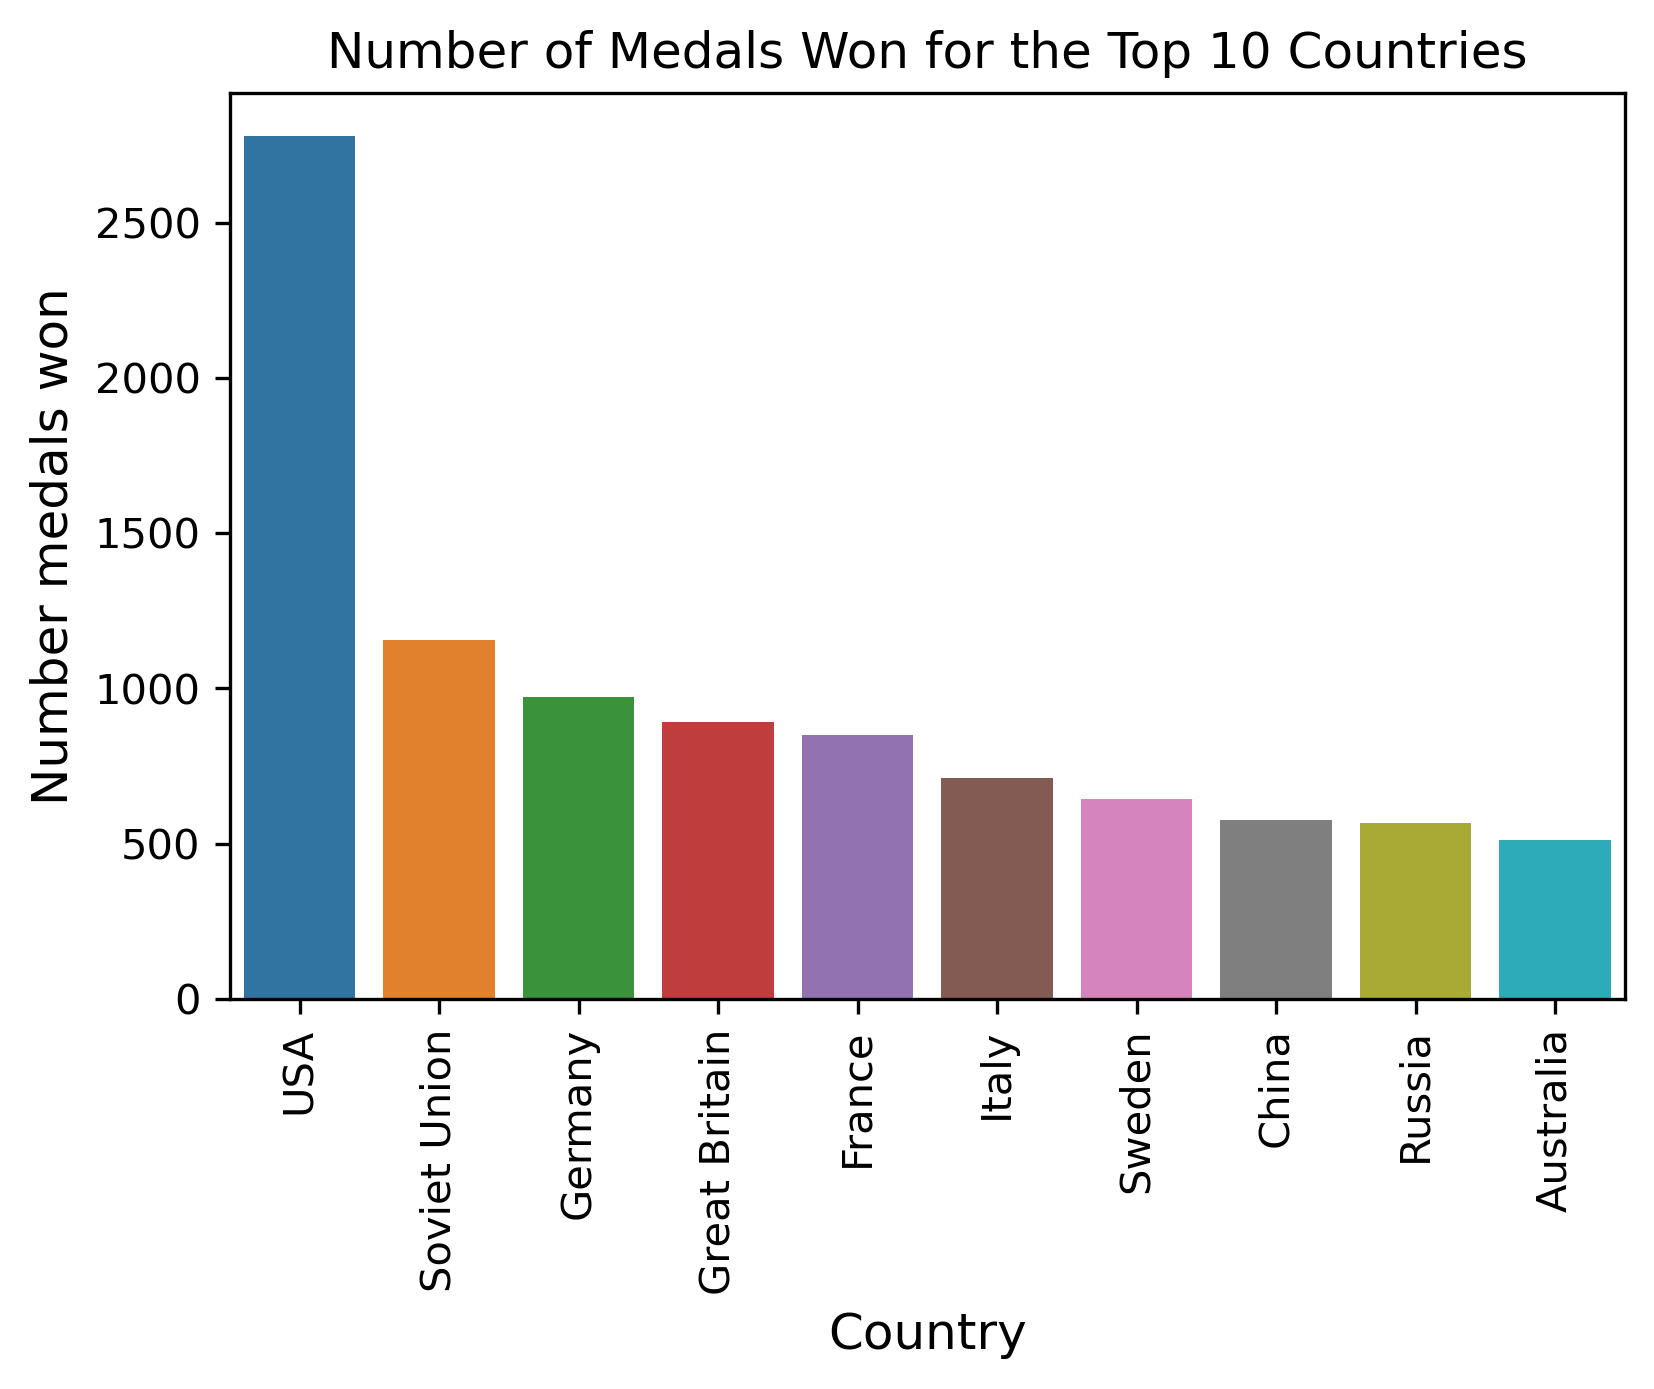

In [26]:
plt.figure(dpi=300, facecolor="white")

fig = sns.barplot(data=top_countries_per_sport, 
                x="NOC",
                y="Number medals won"
                )

fig.set(title="Number of Medals Won for the Top 10 Countries", 
        xticks=fig.get_xticks(),
        )
fig.set_ylabel(fig.get_ylabel(), size=12)
fig.set_xlabel("Country", size=12)

_ = fig.set_xticklabels(["USA", "Soviet Union", "Germany", "Great Britain", "France", "Italy", "Sweden", "China", "Russia", "Australia"], 
                    rotation=90
                    )

### i) Plot features from the data - other

In [27]:
most_wins = pd.DataFrame(os_data["Name"].value_counts()).sort_values(by="Name", ascending=False).head(10).reset_index()
most_wins.rename(columns={"index":"Name", "Name":"Number of medals"}, inplace=True)
most_wins

,Name,Number of medals
0,Robert Tait McKenzie,58
1,Heikki Ilmari Savolainen,39
2,"Joseph ""Josy"" Stoffel",38
3,Ioannis Theofilakis,36
4,Takashi Ono,33
5,Andreas Wecker,32
6,Alexandros Theofilakis,32
7,Alfrd (Arnold-) Hajs (Guttmann-),32
8,Jean Lucien Nicolas Jacoby,32
9,Michel Mathiot,31


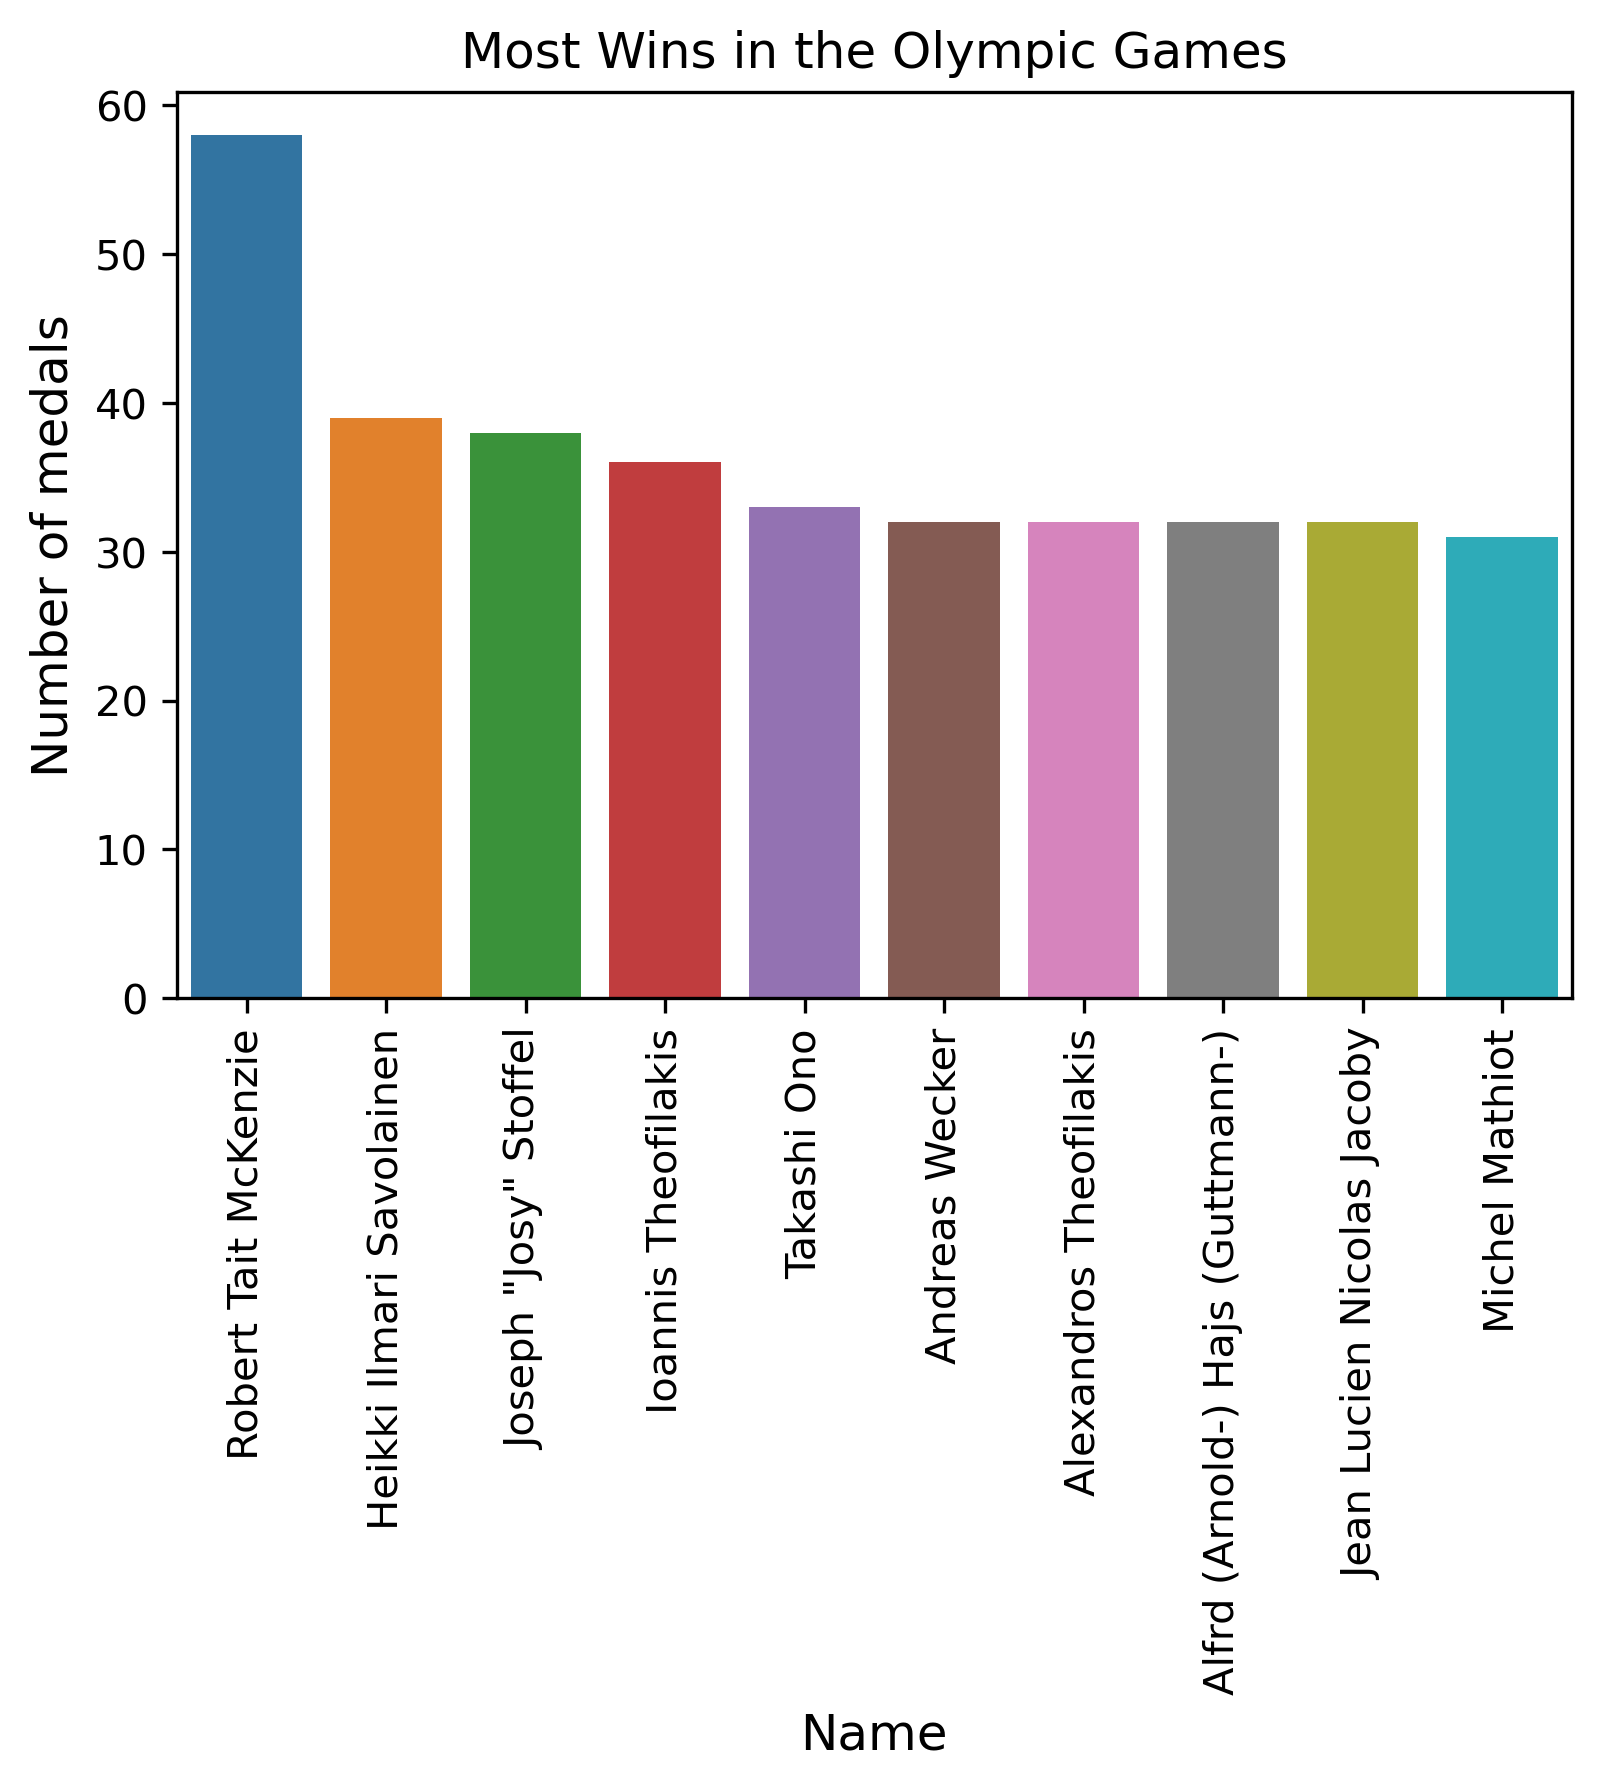

In [28]:
plt.figure(dpi=300, facecolor="white")

fig = sns.barplot(data=most_wins, 
                x="Name",
                y="Number of medals"
                )

fig.set(title="Most Wins in the Olympic Games")
fig.set_ylabel(fig.get_ylabel(), size=12)
fig.set_xlabel(fig.get_xlabel(), size=12)
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

In [29]:
age_gold = os_data[["Medal", "Age"]][os_data["Medal"] == "Gold"]
total_gold = pd.DataFrame(dict(total = age_gold["Medal"].groupby(age_gold["Age"]).count())).reset_index()
total_gold = total_gold.sort_values("total", ascending=False)[:10].reset_index(drop=True)
total_gold

,Age,total
0,23.0,1136
1,24.0,1135
2,22.0,1096
3,25.0,1056
4,26.0,976
5,21.0,925
6,27.0,863
7,28.0,802
8,20.0,674
9,29.0,649


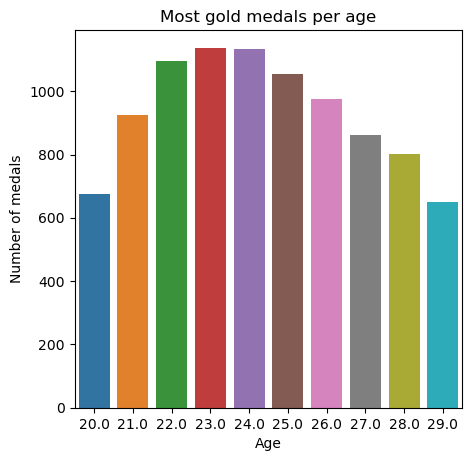

In [30]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
sns.barplot(data=total_gold, y="total", x="Age")
ax.set_title("Most gold medals per age")
ax.set_ylabel("Number of medals")
ax.set_xlabel("Age")
plt.show()

## Exercise 1

In [33]:
os_data["Name"]

0                        A Dijiang
1                         A Lamusi
2              Gunnar Nielsen Aaby
3             Edgar Lindenau Aabye
4         Christine Jacoba Aaftink
                    ...           
271111                  Andrzej ya
271112                    Piotr ya
271113                    Piotr ya
271114          Tomasz Ireneusz ya
271115          Tomasz Ireneusz ya
Name: Name, Length: 271116, dtype: object

In [34]:
os_data["Name"] = os_data["Name"].apply(lambda name:hl.sha256(name.encode()).hexdigest())

In [35]:
os_data["Name"]

0         3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...
1         a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...
2         9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...
3         0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...
4         5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...
                                ...                        
271111    07f491e055f56a7a7be133c9cf6563c253d3aa0d137630...
271112    2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...
271113    2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...
271114    e7fd567d163933f9b76a0094f18afbf8e8291b179c5487...
271115    e7fd567d163933f9b76a0094f18afbf8e8291b179c5487...
Name: Name, Length: 271116, dtype: object

Vinter / sommar
könsfördelning top 10 sporterna baserat på antal medaljer
medals uppdelning i de tre sporterna med mest medaljer




In [36]:
os_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,07f491e055f56a7a7be133c9cf6563c253d3aa0d137630...,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,2f748d07ca91a5a1a6871b8f05cdd4d69f194615a82ca5...,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,e7fd567d163933f9b76a0094f18afbf8e8291b179c5487...,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
